In [43]:
! pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /opt/conda/lib/python3.8/site-packages (2.6.0)


In [44]:
# Import des librairies TensorFlow & Pathlib 
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
tf.__version__

'2.6.0'

In [45]:
train_data= pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [46]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [50]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [47]:
train_data.describe(include="all")

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [49]:
print('train_data shape : ',train_data.shape)
print('test_data shape : ',test_data.shape)

train_data shape :  (7613, 5)
test_data shape :  (3263, 4)


In [48]:
train_data.keyword.unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [51]:
train_data.target.value_counts()/7613

0    0.57034
1    0.42966
Name: target, dtype: float64

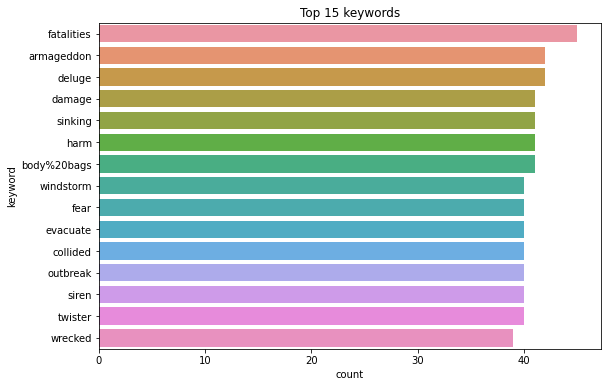

In [52]:
import seaborn as sns
plt.figure(figsize=(9,6))
sns.countplot(y=train_data.keyword, order = train_data.keyword.value_counts().iloc[:15].index)
plt.title('Top 15 keywords')
plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


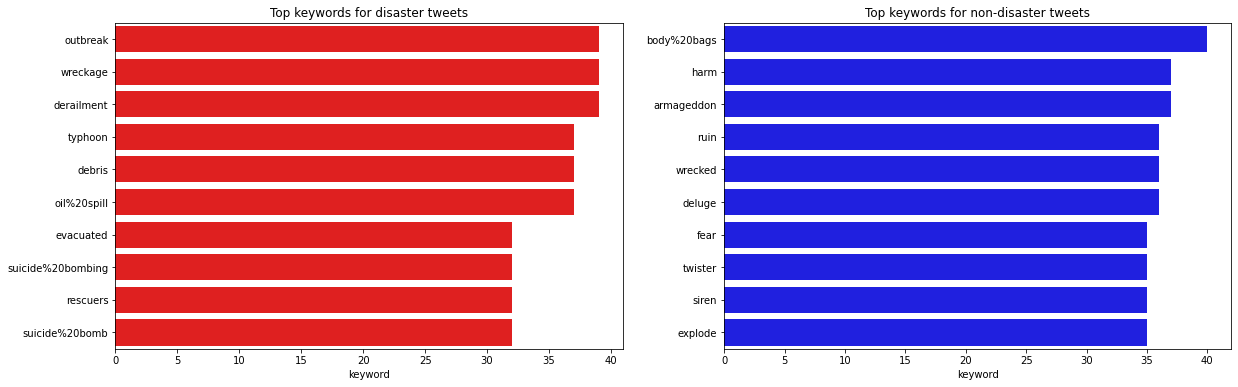

In [53]:
key_d = train_data[train_data.target==1].keyword.value_counts().head(10)
key_nd = train_data[train_data.target==0].keyword.value_counts().head(10)

plt.figure(figsize=(20,6))
plt.subplot(121)
sns.barplot(key_d, key_d.index, color='r')
plt.title('Top keywords for disaster tweets')
plt.subplot(122)
sns.barplot(key_nd, key_nd.index, color='b')
plt.title('Top keywords for non-disaster tweets')
plt.show()

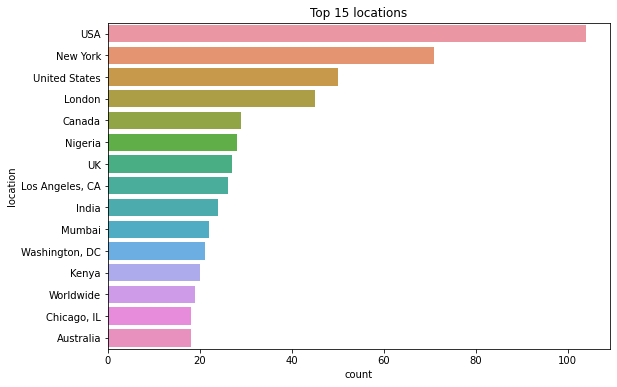

In [55]:
# Most common locations
plt.figure(figsize=(9,6))
sns.countplot(y=train_data.location, order = train_data.location.value_counts().iloc[:15].index)
plt.title('Top 15 locations')
plt.show()

In [37]:
train_data = train_data[['text', 'target']]
train_data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


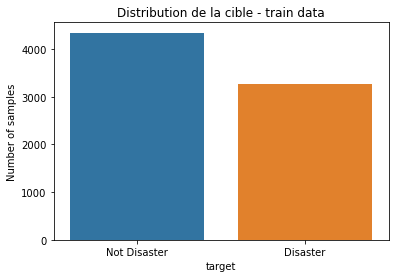

In [56]:
plt.figure()
ax = sns.barplot(x = train_data.target.value_counts().index, y = train_data.target.value_counts())
ax.set (ylabel="Number of samples", 
        title ="Distribution de la cible - train data", 
        xlabel = "target",
        xticklabels = ['Not Disaster', 'Disaster'])
plt.show();

In [57]:
from spacy.lang.en.stop_words import STOP_WORDS

In [58]:

from spacy.lang.en import English

In [59]:
nlp=spacy.load("en_core_web_sm")

In [60]:
train_data.iloc[0,:]

id                                                          1
keyword                                                   NaN
location                                                  NaN
text        Our Deeds are the Reason of this #earthquake M...
target                                                      1
Name: 0, dtype: object

In [61]:
train_data["text_clean"]= train_data["text"].apply(lambda x: re.sub(r'http\S+', '', x))

In [62]:
train_data

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,@aria_ahrary @TheTawniest The out of control w...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M1.94 [01:04 UTC]?5km S of Volcano Hawaii.
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,Police investigating after an e-bike collided ...


In [63]:
def text_processing(train_data):
  
    # lowercase everything
    train_data['text'] = train_data['text'].apply(lambda x: x.lower())
    # get rid of '\n' from whitespace 
    train_data['text'] = train_data['text'].apply(lambda x: x.replace('\n', ' '))
    # regex remove hyperlinks
    train_data['text'] = train_data['text'].str.replace('http\S+|www.\S+', '', case=False)
    # removing '&gt;'
    train_data['text'] = train_data['text'].apply(lambda x: x.replace('&gt;', ''))
    # Removing Emojis from tokens
    train_data['text'] = train_data['text'].apply(lambda x: deEmojify(x))
    # remove punctuations
    train_data['text'] = train_data['text'].apply(remove_punctuations)
    # remove ' s ' that was created after removing punctuations
    train_data['text'] = train_data['text'].apply(lambda x: str(x).replace(" s ", " "))
    
    return train_data
   

In [64]:
 train_data.head()

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...


In [65]:
train_data
# Shape of french_reviews dataset
train_data.shape

(7613, 6)

In [66]:
import numpy as np
tokenizer = tf.keras.preprocessing.text.Tokenizer(1500)
tokenizer.fit_on_texts(train_data.text_clean)

train_data["text_encoded"] = tokenizer.texts_to_sequences(train_data.text_clean)
train_data["len_text"] = train_data["text_encoded"].apply(lambda x: len(x))
train_data = train_data[train_data["len_text"]!=0]

train_data

,id,keyword,location,text,target,text_clean,text_encoded,len_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,"[115, 20, 1, 866, 5, 18, 259, 134, 85, 36]",10
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,"[184, 41, 225, 796, 1402]",5
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,"[36, 4, 3, 20, 132, 17, 35, 437, 252, 53, 3, 7...",15
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...","[833, 55, 1498, 252, 1403, 3, 92]",7
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,"[30, 96, 1219, 18, 316, 19, 26, 267, 19, 1498,...",13
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...,"[110, 859, 1370, 1087, 2, 369, 159, 65, 681, 206]",10
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,@aria_ahrary @TheTawniest The out of control w...,"[1, 34, 5, 749, 258, 111, 3, 92, 164, 3, 1, 19...",17
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M1.94 [01:04 UTC]?5km S of Volcano Hawaii.,"[706, 1212, 103, 5, 586]",5
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,Police investigating after an e-bike collided ...,"[74, 1143, 37, 39, 575, 337, 13, 2, 126, 3, 28...",16


In [67]:
#Padding sequences
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(train_data["text_encoded"], padding="post")

In [68]:
tfs = tf.data.Dataset.from_tensor_slices((padded_sequences,train_data["target"]))

In [69]:
tfs

<TensorSliceDataset shapes: ((28,), ()), types: (tf.int32, tf.int64)>

In [70]:
# Shuffle & Batch
BATCH_SIZE = 32
vocab_size = len(tokenizer.word_index)

In [71]:
next(iter(tfs))

(<tf.Tensor: shape=(28,), dtype=int32, numpy=
 array([115,  20,   1, 866,   5,  18, 259, 134,  85,  36,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0], dtype=int32)>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>)

In [72]:
# Train Test Split
TAKE_SIZE = int(0.7*len(train_data))

train_data = tfs.take(TAKE_SIZE)
test_data = tfs.skip(TAKE_SIZE)

train_data = train_data.shuffle(TAKE_SIZE).batch(BATCH_SIZE)
test_data = test_data.shuffle(len(tfs) - TAKE_SIZE).batch(BATCH_SIZE)

In [73]:
# Create the model
model1 = tf.keras.Sequential([
                  # Input Word Embedding layer        
                  tf.keras.layers.Embedding(vocab_size+1, 64, mask_zero=True),
                  #Drop Out
                  tf.keras.layers.Dropout(.2),
                  # LSTM Bidirectional layer
                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                  #Drop Out
                  tf.keras.layers.Dropout(.2),
                  # LSTM Bidirectionnal new layer
                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                  #Drop Out
                  tf.keras.layers.Dropout(.2),
                  # LSTM new layer
                  tf.keras.layers.LSTM(32, return_sequences=False),
                #Drop Out
                  tf.keras.layers.Dropout(.2)   ,           
                  # Output layer with number of output neurons equal to class number with softmax function
                  #tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(vocab_size+1, activation="softmax")),
                  # Couche Dense classique
                  tf.keras.layers.Dense(32, activation='relu'),
                  tf.keras.layers.Dense(16, activation='relu'),
                  tf.keras.layers.Dense(8, activation='relu'),
                  # Couche de sortie avec le nombre de neurones en sortie égale au nombre de classe avec fonction softmax
                  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [74]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          1158336   
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, None, 128)         98816     
_________________________________________________________________
dropout_6 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)               

In [75]:
optimizer= tf.keras.optimizers.Adam()
model1.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [76]:
# Application of the model on 10 epochs
history = model1.fit(train_data,
                    validation_data=test_data,
                    epochs=10)

Epoch 1/10
167/167 [==============================] - 44s 141ms/step - loss: 0.5857 - binary_accuracy: 0.6885 - val_loss: 0.5138 - val_binary_accuracy: 0.7585
Epoch 2/10
167/167 [==============================] - 18s 106ms/step - loss: 0.4288 - binary_accuracy: 0.8170 - val_loss: 0.5036 - val_binary_accuracy: 0.7642
Epoch 3/10
167/167 [==============================] - 18s 106ms/step - loss: 0.3719 - binary_accuracy: 0.8572 - val_loss: 0.5217 - val_binary_accuracy: 0.7489
Epoch 4/10
167/167 [==============================] - 18s 105ms/step - loss: 0.3424 - binary_accuracy: 0.8704 - val_loss: 0.5371 - val_binary_accuracy: 0.7511
Epoch 5/10
167/167 [==============================] - 17s 104ms/step - loss: 0.3048 - binary_accuracy: 0.8858 - val_loss: 0.5857 - val_binary_accuracy: 0.7362
Epoch 6/10
167/167 [==============================] - 18s 105ms/step - loss: 0.2839 - binary_accuracy: 0.8920 - val_loss: 0.6273 - val_binary_accuracy: 0.7327
Epoch 7/10
167/167 [==========================

In [77]:
model1.predict(train_data)

array([[0.02085349],
       [0.04923108],
       [0.02191567],
       ...,
       [0.99576604],
       [0.9866197 ],
       [0.02010253]], dtype=float32)

In [78]:
model1.predict(test_data)

array([[0.9624055 ],
       [0.9948199 ],
       [0.04110223],
       ...,
       [0.5330531 ],
       [0.02709869],
       [0.05768305]], dtype=float32)

In [79]:
mod_pred=model1.predict(test_data)>.5
mod_pred=pd.DataFrame(mod_pred)
mod_pred.head()

,0
0,True
1,True
2,False
3,False
4,False


In [80]:
mod_pred[0]=mod_pred[0].apply(int)
mod_pred.head()

,0
0,1
1,1
2,0
3,0
4,0


In [81]:
test_dataset=pd.DataFrame(test_data.unbatch())
type(test_dataset)

pandas.core.frame.DataFrame

In [82]:
test_dataset

,0,1
0,"(tf.Tensor(929, shape=(), dtype=int32), tf.Ten...","tf.Tensor(0, shape=(), dtype=int64)"
1,"(tf.Tensor(700, shape=(), dtype=int32), tf.Ten...","tf.Tensor(0, shape=(), dtype=int64)"
2,"(tf.Tensor(31, shape=(), dtype=int32), tf.Tens...","tf.Tensor(0, shape=(), dtype=int64)"
3,"(tf.Tensor(3, shape=(), dtype=int32), tf.Tenso...","tf.Tensor(0, shape=(), dtype=int64)"
4,"(tf.Tensor(417, shape=(), dtype=int32), tf.Ten...","tf.Tensor(1, shape=(), dtype=int64)"
...,...,...
2277,"(tf.Tensor(10, shape=(), dtype=int32), tf.Tens...","tf.Tensor(0, shape=(), dtype=int64)"
2278,"(tf.Tensor(1, shape=(), dtype=int32), tf.Tenso...","tf.Tensor(1, shape=(), dtype=int64)"
2279,"(tf.Tensor(3, shape=(), dtype=int32), tf.Tenso...","tf.Tensor(0, shape=(), dtype=int64)"
2280,"(tf.Tensor(9, shape=(), dtype=int32), tf.Tenso...","tf.Tensor(1, shape=(), dtype=int64)"


In [83]:
test_dataset[0] = test_dataset[0].apply(lambda x: [i.numpy() for i in x])   #permet d'extraire les valeurs du tuple, itère sur autres lignes

In [84]:
test_dataset[1] = test_dataset[1].apply(lambda x: x.numpy())

In [85]:
test_dataset[1]
test_dataset.head()

,0,1
0,"[929, 19, 436, 4, 54, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
1,"[700, 166, 14, 59, 40, 6, 647, 3, 29, 142, 59,...",0
2,"[31, 44, 7, 10, 33, 294, 502, 128, 11, 464, 12...",0
3,"[3, 1237, 7, 38, 136, 267, 44, 7, 2, 18, 0, 0,...",0
4,"[417, 1485, 25, 261, 5, 71, 0, 0, 0, 0, 0, 0, ...",1


In [86]:
#untokenize mots + appliquer le mask pour ne garder que les false et voir ce qui pêche.
test_dataset["detokenize"]=tokenizer.sequences_to_texts(test_dataset[0])

In [87]:
mask=test_dataset[1]!=mod_pred[0]
test_dataset_mask=test_dataset.loc[mask,:]
test_dataset_mask

,0,1,detokenize
0,"[929, 19, 436, 4, 54, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,public from whirlwind to news
1,"[700, 166, 14, 59, 40, 6, 647, 3, 29, 142, 59,...",0,doesn't help that he has and wake in but think...
4,"[417, 1485, 25, 261, 5, 71, 0, 0, 0, 0, 0, 0, ...",1,windstorm updates amp state of emergency
8,"[44, 418, 2, 897, 38, 46, 2, 5, 1, 290, 844, 1...",0,if there's a chance will get a of the sinking ...
10,"[1003, 394, 12, 149, 47, 15, 1111, 12, 530, 0,...",1,israel wrecked my home now it wants my land
...,...,...,...
2271,"[37, 36, 14, 91, 430, 182, 172, 158, 39, 875, ...",0,after all that time riot should really make an...
2273,"[4, 338, 265, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,to rescue plan
2274,"[281, 250, 941, 422, 384, 16, 249, 17, 1096, 1...",1,severe weather issued august 05 at 10 by nws t...
2275,"[94, 76, 259, 3, 5, 92, 1033, 1, 259, 9, 50, 1...",1,1 3 earthquake in of california download the e...


In [88]:
test_dataset_mask[1].value_counts()

0    607
1    512
Name: 1, dtype: int64

En conclusion, on constate  une mauvaise labelisation du dataset. 
Ce qui fausse complètement l'entrainement du modèle.